### **파이썬을 활용한 빅데이터 분석**

##### Chapter 10 기타 기계학습을 이용한 데이터 분석

##### 2020710058 Applied Data Science Doo-yeonog, Lee

##### 10.1.4 K-means 실습

In [2]:
# Load libraries
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Make a sample dataset
np.random.seed(0)

centers = [[1,1], [0,0], [2,-1]] # the number of centers to generate
n_clusters = len(centers)

data, labels_true = make_blobs(n_samples = 2000, centers = centers, cluster_std = 0.7)

In [8]:
# Chech the data and tha Label
print(data)
print('--------------------------')
print(labels_true)
print(np.unique(labels_true))

[[ 2.88735684  0.94825273]
 [ 0.00712986  1.53880744]
 [ 0.3264657  -0.06607475]
 ...
 [ 0.53901292  0.64003622]
 [ 1.65065358  1.40755721]
 [ 0.74131908 -0.71579507]]
--------------------------
[0 1 1 ... 0 0 1]
[0 1 2]


[0.  0.5 0.5 ... 0.  0.  0.5]


(<matplotlib.axes._subplots.AxesSubplot at 0x1f054282c48>,
 Text(0.5, 1.0, 'Dataset Scattered by labels_true'))

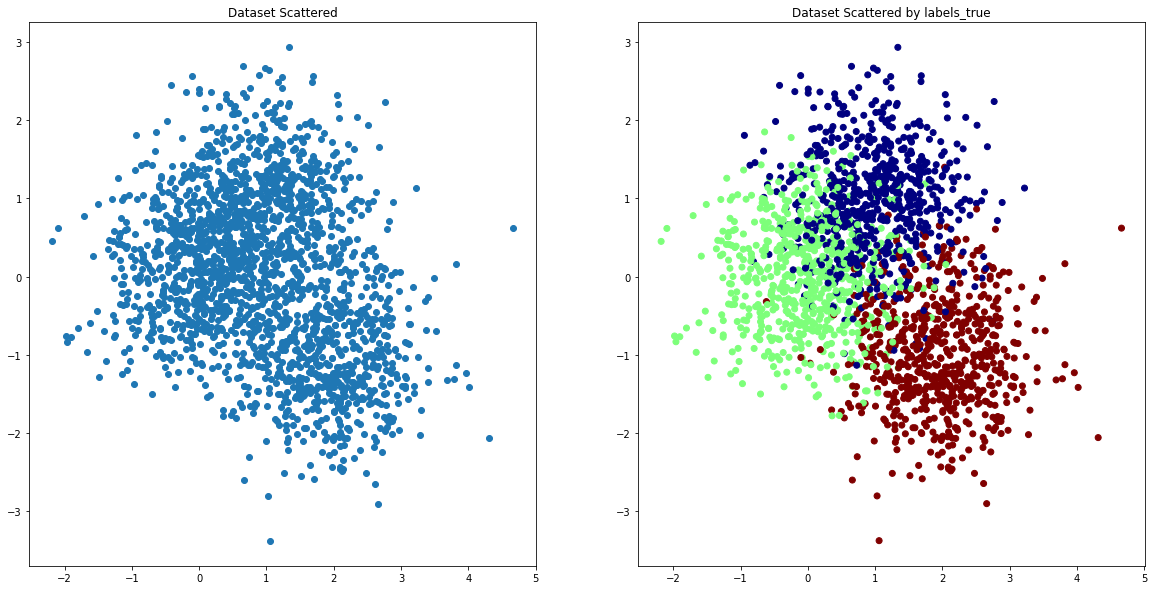

In [23]:
# Visualization to check the data
cm = plt.cm.get_cmap('jet')
scaled_labels_true = (labels_true - np.min(labels_true))
scaled_labels_true = scaled_labels_true / (np.max(labels_true) - np.min(labels_true))

plt.figure(figsize = (20,10))
plt.subplot(1,2,1), plt.scatter(data[:,0], data[:,1]), plt.title('Dataset Scattered')
plt.subplot(1,2,2), plt.scatter(data[:,0], data[:,1], c = cm(scaled_labels_true)), plt.title('Dataset Scattered by labels_true')

In [25]:
# Compute a clustering with KMeans
estimator = KMeans(init = 'k-means++', n_clusters = 3, n_init = 10)
estimator.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
# Check the Clustering Result
labels_predict = estimator.labels_
labels_predict

array([0, 0, 2, ..., 0, 0, 2])

In [29]:
# Normalizaton to make the labels the valeus from 0 to 1
scaled_labels_predict = (labels_predict - np.min(labels_predict))
scaled_labels_predict = scaled_labels_predict / (np.max(labels_predict) - np.min(labels_predict))

(<matplotlib.axes._subplots.AxesSubplot at 0x1f055333b48>,
 Text(0.5, 1.0, 'Dataset Scattered by labels_predict(KMeans)'))

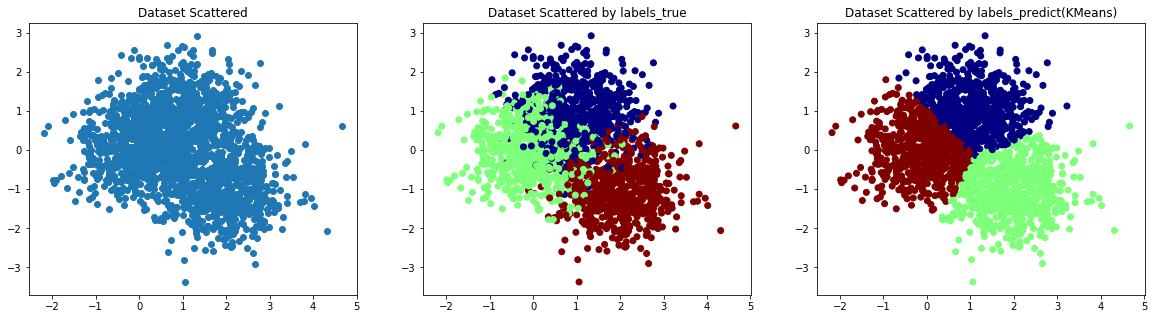

In [32]:
# Visulization
plt.figure(figsize = (20,5))
plt.subplot(1,3,1), plt.scatter(data[:,0], data[:,1]), plt.title('Dataset Scattered')
plt.subplot(1,3,2), plt.scatter(data[:,0], data[:,1], c = cm(scaled_labels_true)), plt.title('Dataset Scattered by labels_true')
plt.subplot(1,3,3), plt.scatter(data[:,0], data[:,1], c = cm(scaled_labels_predict)), plt.title('Dataset Scattered by labels_predict(KMeans)')

##### Additional Practice

In [33]:
# Load Libraries
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
import pandas as pd

np.random.seed(60)

In [34]:
# Load the Data and Check the Data and Labels
digits = load_digits()
data = digits.data
print("<Before Scaling>")
print(data)
print("<After Scaling")
data = scale(data)
print(data)

<Before Scaling>
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
<After Scaling
[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]


In [36]:
# Check the number of data, features and labels
labels_true = digits.target
n_samples, n_features = data.shape
clusters = np.unique(labels_true)
n_clusters = len(clusters)

print("n_samples: ", n_samples)
print("n_features: ", n_features)
print("n_clusters: ", n_clusters)
print("clusters: ", clusters)

n_samples:  1797
n_features:  64
n_clusters:  10
clusters:  [0 1 2 3 4 5 6 7 8 9]


In [38]:
# Random and KMean++ Model
estimator1 = KMeans(init = 'k-means++', n_clusters = n_clusters, n_init = 10)
estimator1.fit(data)

estimator2 = KMeans(init = 'random', n_clusters = n_clusters, n_init = 10)
estimator2.fit(data)

labels_predict1 = estimator1.labels_
labels_predict2 = estimator2.labels_

In [48]:
# Evaluation the models
from sklearn import metrics

print("<clustering performance evaluation> \n")
print("1. clustering with initializing first centroids of clusters with k-means++")
print("homogenity score : %.3f" %(metrics.homogeneity_score(labels_true, labels_predict1)))
print("completeness score : %.3f" %(metrics.completeness_score(labels_true, labels_predict1)))
print("v_measure score : %.3f" %(metrics.v_measure_score(labels_true, labels_predict1)))
print()
print("2. clustering with initializing first centroids of clusters with random")
print("homogenity score : %.3f" %(metrics.homogeneity_score(labels_true, labels_predict2)))
print("completeness score : %.3f" %(metrics.completeness_score(labels_true, labels_predict2)))
print("v_measure score : %.3f" %(metrics.v_measure_score(labels_true, labels_predict2)))


<clustering performance evaluation> 

1. clustering with initializing first centroids of clusters with k-means++
homogenity score : 0.679
completeness score : 0.718
v_measure score : 0.698

2. clustering with initializing first centroids of clusters with random
homogenity score : 0.643
completeness score : 0.689
v_measure score : 0.665
